<a href="https://colab.research.google.com/github/mueller14003/PH150/blob/main/KyleLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approximating Pi Using the Monte Carlo Method
## by Kyle Mueller

## Introduction

Pi ($\pi$) is a well-known mathematical constant that represents the ratio between the circumference and the diameter of a circle. An equation for calculating Pi can be seen below:

(1) $$\pi = \frac{C}{d}$$

where $C$ is the circumference of a given circle and $d$ is the corresponding diameter of said circle.

However, despite the depiction above, Pi cannot be represented as a fraction. Pi is an irrational number with an *infinite* amount of decimal digits. This makes it impossible to ever fully capture, calculate, or comprehend Pi. Notwithstanding, we as humans have been continually calculating Pi with greater precision for ***millennia***!

Another method for calculating Pi is known as the Monte Carlo Method [[1](#scrollTo=Ja4XOgdylB8g)]. This method uses the surface area of a square and the surface area of a circle with equal diameters. The surface area of a square can be calculated as:

(2) $$SA_{square} = (2r)^{2} = 4r^{2}$$

where $r$ is the radius of the square ($\frac{1}{2}$ the diameter or length of an edge of the square). The surface area of a circle can be calculated as:

(3) $$SA_{circle} = \pi{}r^2$$

where $r$ is the radius of the circle. We can use these two surface areas to calculate Pi like so:

(4) $$\pi = 4\times{}\frac{SA_{circle}}{SA_{square}} = 4\times{}\frac{\pi{}r^{2}}{4r^{2}} = 4\times{}\frac{\pi}{4} = \pi$$

In this lab, I will use two different measuring techniques to calculate Pi in order to see which method will yield more accurate results. I will record data for the circumference and diameter of various circular objects, and I will use Equation 1 to calculate Pi. I will analyze whether circles with larger diameters yield better results. I will also measure the mass of a square and a circle with equal diameter, and I will calculate Pi using the Monte Carlo Method (as shown in Equation 4). I will calculate uncertainties for all measurements and calculations.

## Experimental Plan

The materials needed to complete this lab are as follows:
* 1 pencil
* 1 measuring tape
* 1 straight edge
* 1 pair of scissors
* 1 thick piece of paper
* 1 compass and protractor
* 1 precise electronic scale
* Multiple circular objects of varying sizes

Start by measuring the circumference and the diameter of circular objects of varying sizes. Record these measurements in a table, along with their uncertainties and the corresponding calculations of Pi. 

Next, take the thick piece of paper and measure the shorter side. Use the measuring tape to measure a segment of the paper of equal length on the longer side. Use the straight edge to draw a line at the measured location. Then use the scissors to cut the paper along the line (be as precise as possible). Measure the mass of the resulting square piece of paper. 

Next, determine the exact center of the square by measuring and drawing precise diameter lines. Place the point of the compass at the center of the square, and align the drawing side of the compass with the edge of the paper on one of your diameter lines. Carefully draw a circle using the compass, making sure that it stays firmly in the center of the square. Carefully and precisely cut out the circle. Finally, measure the mass of the circle.


## Data and Observations

### Circumference / Diameter

In [92]:
from IPython.display import Markdown
from math import sqrt, pi

# Measured circumference and diameter
O = ["large pot", "bucket", "soup bowl", "cereal bowl", "small cup", "wedding ring"] # Object
C = [80.1, 73.5, 63.8, 48.3, 29.0, 7.0] # cm (Circumference)
D = [25.5, 23.4, 20.3, 15.4, 9.2,  2.2] # cm (Diameter)

# List of corresponding calculations of Pi
πl = [*map(lambda c,d: c/d, C, D)]

# Uncertainties
δcm = 0.05 # cm (δ measuring tape)
δπl = [*map(lambda c,d,π: π*sqrt((δm/c)**2+(δm/d)**2), C, D, πl)] # cm

# Percent Difference
p_err = [*map(lambda x: (abs(pi-x)/pi)*100, πl)]

# Table
header = f"|Object|C (cm)|d (cm)|δcm (cm)|π|δπ|% Error|\n|:-|-:|-:|-:|-:|-:|-:|\n"
body = '\n'.join([*map(lambda o,c,d,π,δπ,pe: f"|{o}|{c:0.1f}|{d:0.1f}|{δm:0.2f}|{π:0.3f}|{δπ:0.3f}|{pe:0.2f}|",O,C,D,πl,δπl,p_err)])

Markdown(header + body)

|Object|C (cm)|d (cm)|δcm (cm)|π|δπ|% Error|
|:-|-:|-:|-:|-:|-:|-:|
|large pot|80.1|25.5|0.05|3.141|0.006|0.01|
|bucket|73.5|23.4|0.05|3.141|0.007|0.02|
|soup bowl|63.8|20.3|0.05|3.143|0.008|0.04|
|cereal bowl|48.3|15.4|0.05|3.136|0.011|0.17|
|small cup|29.0|9.2|0.05|3.152|0.018|0.34|
|wedding ring|7.0|2.2|0.05|3.182|0.076|1.28|

### Monte Carlo Method

In [12]:
# Measured mass of square and circle
sm = 7.8587 # g (Square mass)
cm = 6.1722 # g (Circle mass)

# Calculated Pi
π = (cm/sm)*4

# Uncertainties
δg = 0.0001 # g (δ scale)
δπ = π*sqrt((δg/sm)**2+(δg/cm)**2)

print(f'Approximation of π with the Monte Carlo Method: {π:0.5f} ±{δπ:0.5f}')

Approximation of π with the Monte Carlo Method: 3.14159 ±0.00006


## Discussion of Results

### Graphs & Data Analysis

Graph 1: Percent Error vs. Diameter.

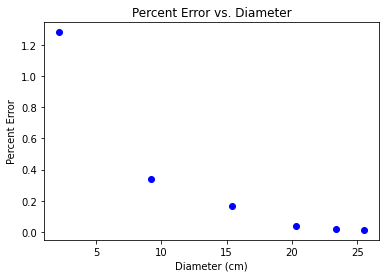

In [93]:
# Import libraries
import matplotlib.pyplot as plt

plt.plot(D, p_err, 'bo')
plt.xlabel('Diameter (cm)')
plt.ylabel('Percent Error')
plt.title('Percent Error vs. Diameter')

plt.show()

Graph 2: Uncertainty vs. Diameter.

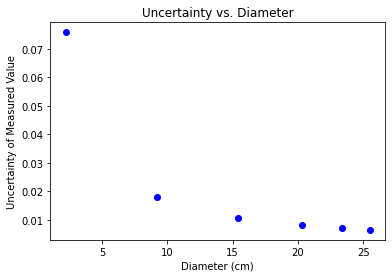

In [96]:
plt.plot(D, δπl, 'bo')
plt.xlabel('Diameter (cm)')
plt.ylabel('Uncertainty of Measured Value')
plt.title('Uncertainty vs. Diameter')

plt.show()

In [95]:
print(f"Percent Error of the Monte Carlo approximation: {100*(abs(pi-π)/pi):0.4f}%")

Percent Error of the Monte Carlo approximation: 0.0001%


### Discussion

In analyzing the data, it is clear that the Monte Carlo Method yielded significantly better results. Looking more closely at the results of calculating Pi by dividing the measured circumference by the measured diameter of a circle shows that as the diameter of the circular object being measured decreases, the accuracy of the calculated value also significantly decreases (see Graph 1 and Graph 2). 

Both trends (Graph 1 and Graph 2) seem to be logarithmic in nature, signifying that as the diameter of the circular object being measured increases, the percent error and the uncertainty both approach zero. However, due to the nature of the trend, approximating Pi by dividing the measured circumference by the measured diameter of a circle would require a very large circular object to gather data as precise as the data I gathered using the Monte Carlo method.

The data I collected for the Monte Carlo approximation also used a very precise digital scale, which likely helped to make the approximation more precise. I also took great care in my measurements and in the cuts I made in the paper to make both the square and the circle, which is likely a factor that influenced the results.

## Conclusions

Using the Monte Carlo Method for approximating Pi yielded very impressive results. Approximating Pi by dividing the circumference by the diameter of small circular objects proved to be less precise and less accurate. It would require a very large circular object to calculate Pi with greater accuracy by using the $\frac{C}{d}$ method. Both of these methods are viable, but my data suggests that using the Monte Carlo Method yields better results. This is despite the fact that the paper circle and rectangle used for the approximation had relatively small diameters (21.2 cm).

## Sources

### Source Used For Reference

[1] Williamson, Timothy. "Calculating Pi Using the Monte Carlo Method." The Physics Teacher 51.8 (2013): 468-469. [source](https://aapt.scitation.org/doi/full/10.1119/1.4824938?casa_token=SdT5jr_buQEAAAAA%3ACsdCzc0I1Zpljmi3ckpi1z3g0AGLj2palGVUEL11J1hYRaSMHsKaNQYfNYzvbSyDcA2U0gXfLX5fCZo)

### Other Helpful Resources

Calculating pi by weighing a circle: https://youtu.be/Ngj0a57Rlb0

Geometric Calculation of Pi Using the Monte Carlo Method: https://www.researchgate.net/profile/Andrii-Kovalchuk/publication/306064632_Geometric_calculation_of_Pi_using_the_Monte_Carlo_method/links/5e8ced7ca6fdcca789fddde7/Geometric-calculation-of-Pi-using-the-Monte-Carlo-method.pdf
